In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

scaler = StandardScaler()

# Dataset Description

For this programming material, we are going to use 
[gene expression cancer RNA-Seq Data Set](https://archive.ics.uci.edu/dataset/401/gene+expression+cancer+rna+seq). Originally, this dataset is hosted at [synapse](https://www.synapse.org/) but for this programming material, we are going to extract dataset from [UCI](https://archive.ics.uci.edu/). The dataset contains gene expression of patients having different types of tumor: BRCA, KIRC, COAD, LUAD and 
PRAD. 

**Source:** Samuele Fiorini, samuele.fiorini@dibris.unige.it, University of Genoa, redistributed under Creative Commons license (http://creativecommons.org/licenses/by/3.0/legalcode) from https://www.synapse.org/#!Synapse:syn4301332.

**Number of attributes:** 20531

**Number of instances:** 801

In [2]:
data = pd.read_csv("CANCER_RNA_SEQ/data.csv", index_col=0)
labels = pd.read_csv("CANCER_RNA_SEQ/labels.csv", index_col = 0)

In [3]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [6]:
# Scaling Labels for Kmeans
X_scaled = scaler.fit_transform(data)

In [12]:
import time

start = time.time()
kmeans = KMeans(n_clusters=5,max_iter=500, random_state=99)
kmeans.fit(X_scaled)
end = time.time()

print(f"Time Required to run {end-start} seconds")
print("Sum of Sq. distance of sample and centroid :", kmeans.inertia_)

Time Required to run 0.31945323944091797 seconds
Sum of Sq. distance of sample and centroid : 12453099.854019707


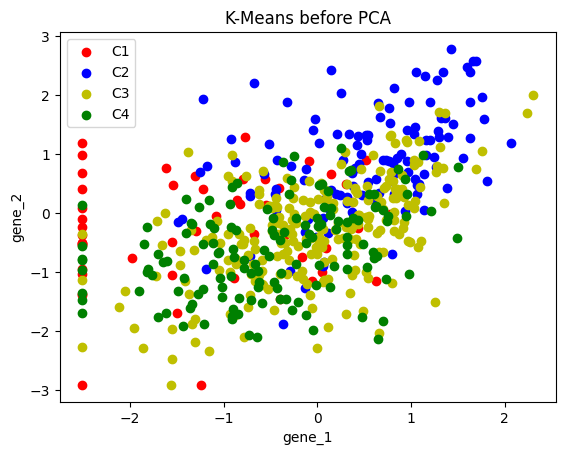

In [13]:
for color, i in zip("rbyg", [0,1,2,3,4]):
    plt.scatter(
        X_scaled[kmeans.labels_ == i, 1], X_scaled[kmeans.labels_ == i, 2], c = color
    )
plt.xlabel("gene_1")
plt.ylabel("gene_2")
plt.legend(['C1','C2','C3','C4','C4'])
plt.title("K-Means before PCA")
plt.show()

# Clustering after applying PCA

Now let's cluster the data after reducing it's dimension using PCA. We will see how dimensionality reduction using PCA improves the performance of Kmeans clustering.

In [22]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [48]:
sum(pca.explained_variance_ratio_)*100

np.float64(19.29401381992424)

In [49]:
pd.DataFrame(X_reduced)

,0,1
0,-57.446987,-95.410981
1,-16.919430,-0.732470
2,-70.345218,19.303327
3,-49.161591,9.227586
4,-18.132534,51.327797
...,...,...
796,-12.417385,42.321573
797,-29.415554,-28.526281
798,-4.133090,-15.690014
799,-30.814757,-33.526422


In [50]:
# Applying KMeans after reduction
import time

start = time.time()
kmeans = KMeans(n_clusters=5,max_iter=500, random_state=99)
kmeans.fit(X_reduced)
end = time.time()

print(f"Time Required to run {end-start} seconds")
print("Sum of Sq. distance of sample and centroid :", kmeans.inertia_)

Time Required to run 0.003418445587158203 seconds
Sum of Sq. distance of sample and centroid : 645876.0179076749


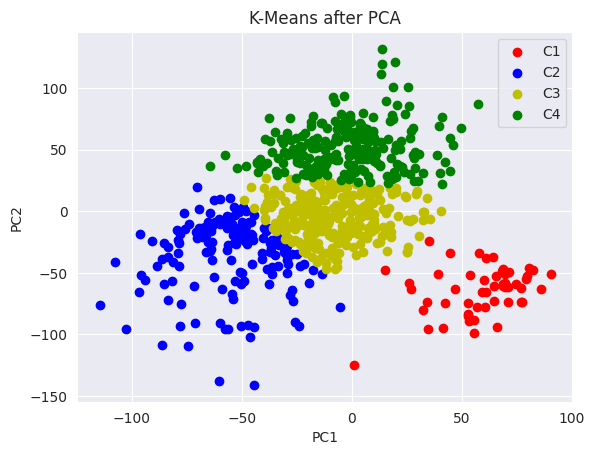

In [52]:
for color, i in zip("rbyg", [0,1,2,3,4]):
    plt.scatter(
        X_reduced[kmeans.labels_ == i, 0], X_reduced[kmeans.labels_ == i, 1], c = color
    )
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(['C1','C2','C3','C4','C5'])
plt.title("K-Means after PCA")
plt.show()

In [21]:
label, mapping = pd.factorize(labels.Class)
X_scaled = scaler.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,label, test_size=0.3, random_state=42)

In [32]:
def run_model_get_f1(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return accuracy_score(y_test, model.predict(X_test))

run_model_get_f1(X_train, X_test, y_train, y_test)

1.0